In [1]:
%matplotlib notebook

In [2]:
import tensorflow as tf
import librosa
import librosa.display
import os
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

# Loading Music

In [3]:
CONTENT_FILENAME = "inputs/treasure_10.mp3"
STYLE_FILENAME = "inputs/g_and_g_10s.mp3"

In [4]:
print("CONTENT_FILENAME: {}".format(CONTENT_FILENAME))
display(Audio(CONTENT_FILENAME))
print("STYLE_FILENAME: {}".format(STYLE_FILENAME))
display(Audio(STYLE_FILENAME))

CONTENT_FILENAME: inputs/treasure_10.mp3


STYLE_FILENAME: inputs/g_and_g_10s.mp3


## Load audio file in librosa

In [5]:
# By default, librosa will resample the signal to 22050Hz.
y, sr = librosa.load(STYLE_FILENAME, sr=None)
sr

44100

In [6]:
y.shape

(442368,)

In [7]:
display(Audio(data=y, rate=sr))

## Spectogram

In [17]:
# How about something more advanced?  Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=128, sort=True)


<IPython.core.display.Javascript object>


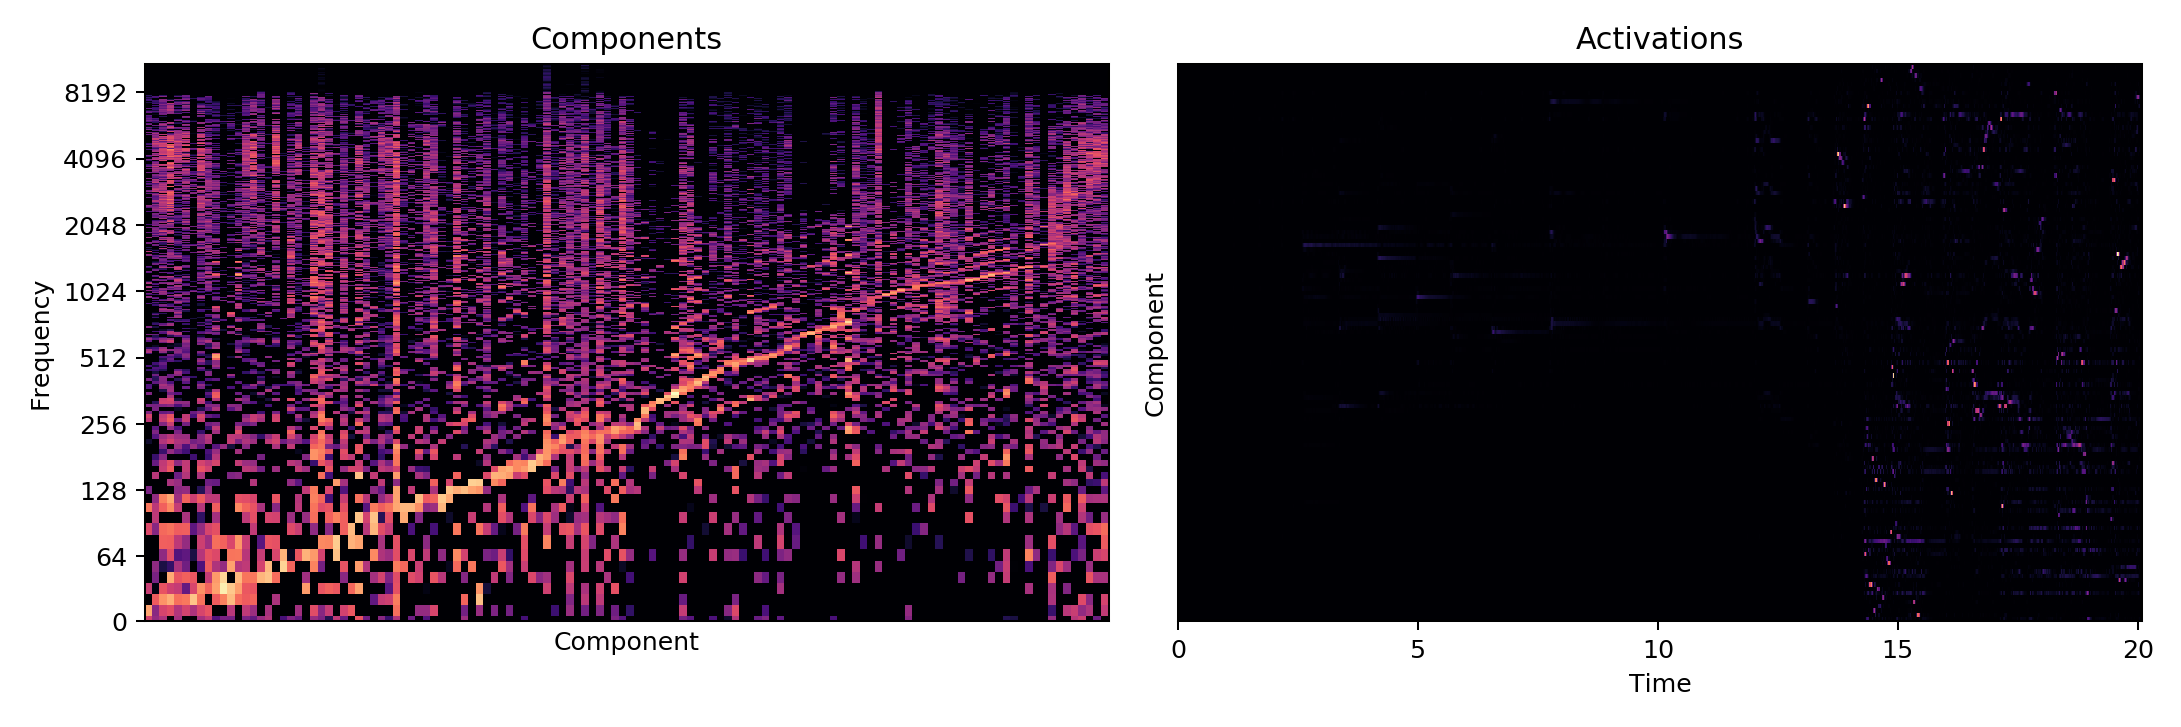

In [18]:


# Visualize the components and activations, just for fun

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(components), ref=np.max), y_axis='log')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Components')

plt.subplot(1,2,2)
librosa.display.specshow(activations, x_axis='time')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Activations')

plt.tight_layout()



In [19]:
print(components.shape, activations.shape)

(1025, 128) (128, 865)


In [20]:
phase.shape

(1025, 865)

In [21]:


# Play back the reconstruction
# Reconstruct a spectrogram by the outer product of component k and its activation
D_k = components.dot(activations)

# invert the stft after putting the phase back in
y_k = librosa.istft(D_k * phase)

# And playback
print('Full reconstruction')

display(Audio(data=y_k, rate=sr))



Full reconstruction
